# IYKRA's Statistics Practice Case

On this week's coding module, we are required to solve some statistics problems about health insurance. You can find the dataset here:

https://www.kaggle.com/brandonyongys/insurance-charges

Here are some problems that needed to be solved:

1. Perform basic exploratory data analysis which should include the following and print out your insights at every step: <br>
&emsp;A. The shape of the data<br>
&emsp;B. The data type of each attribute<br>
&emsp;C. Checking the presence of missing values<br>
&emsp;D. 5 points summary of numerical attributes<br>
&emsp;E. Distribution of 'bmi', 'age' and 'charges' columns<br>
&emsp;F. The measure of skewness of 'bmi', 'age', and 'charges' columns<br>
&emsp;G. Checking the presence of outliers in 'bmi', 'age' and 'charges' columns<br><br>

2. Answer the following questions with statistical evidence
A. Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

In [2]:
#Importing required libraries and the dataset

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'E:\IYKRA\Week 3\insurance.csv')

# Question #1

## 1.A. The shape of the data

In [3]:
data.shape

(1338, 7)

The dataset consists of 1338 rows and 7 columns.

## 1.B. The data type of each attribute

In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## 1.C. Checking the presence of missing values

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing values in sight.

## 1.D. 5 points summary of numerical attributes

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 1.E. Distribution of 'bmi', 'age' and 'charges' columns

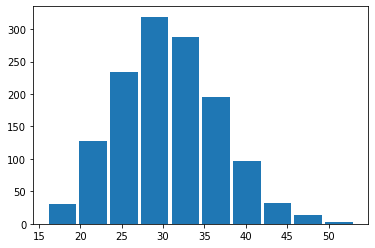

In [7]:
plt.hist(data.bmi, rwidth = 0.9)
plt.show()

The BMI distribution is quite normal with a slight positive skew.

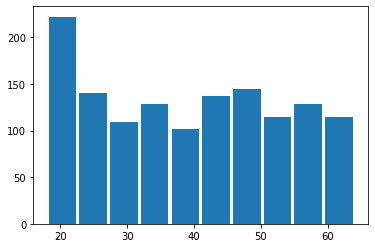

In [8]:
plt.hist(data.age, rwidth = 0.9)
plt.show()

The age distribution is considered as uniform distribution. We also could say that it has a bimodal distribution.

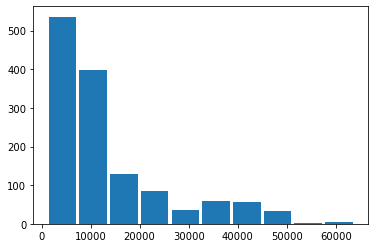

In [5]:
plt.hist(data.charges, rwidth = 0.9)
plt.show()

The charges variable is highly positive-skewed.

## 1.F. The measure of skewness of 'bmi', 'age', and 'charges' columns

In [10]:
data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

## 1.G. Checking the presence of outliers in 'bmi', 'age' and 'charges' columns

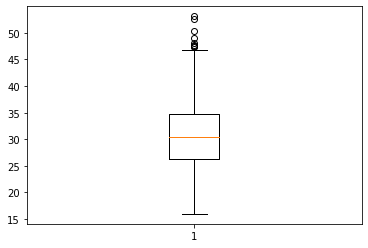

In [11]:
plt.boxplot(data.bmi)
plt.show()

There are several outliers in the BMI variable. That is why the BMI distribution has a slight skewed on its distribution.

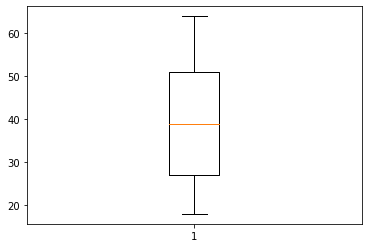

In [12]:
plt.boxplot(data.age)
plt.show()

There is no outlier in the age variable.

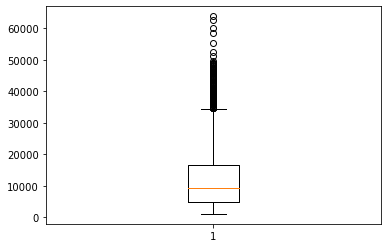

In [13]:
plt.boxplot(data.charges)
plt.show()

There are so many outliers in the charges variable. That is why the charges variable is highly positive-skewed

# Question 2

To answer the second question, we need to define our null and alternative hypothesis. For this case, that would be:

H0 (null hypothesis) : Charges of people who smoke **are the same** as charges of people who don't smoke. <br>
H1 (alternative hypothesis) : Charges of people who smoke **differ** from charges of people who don't smoke.

In [3]:
#Aggregating and taking a quick look at smoker composition

smoker_freq = data.groupby('smoker', as_index = False).agg(count = ('smoker','count'))

smoker_freq

,smoker,count
0,no,1064
1,yes,274


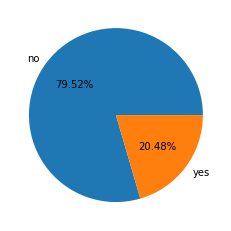

In [4]:
#Plotting smoker composition

plt.pie(smoker_freq['count'], labels = smoker_freq['smoker'], autopct = '%.2f%%')
plt.show()

In [6]:
#Preparing the two required variables

smoker = data[data['smoker'] == 'yes']
non_smoker = data[data['smoker'] == 'no']

## 2.1. Normality Test with Shapiro

To decide what's the best hypothesis test to take, we need to do a normality test first for each variable and see their probability distribution.

In [16]:
from scipy.stats import shapiro

In [17]:
stat, p = shapiro(smoker['charges'])
alpha = 0.5

if p > alpha:
    print("Looks like a Gaussian distribution")
else:
    print("Does not look like a Gaussian distribution")

Does not look Gaussian


In [18]:
stat2, p2 = shapiro(non_smoker['charges'])
alpha = 0.5

if p2 > alpha:
    print("Looks like a Gaussian distribution")
else:
    print("Does not look like a Gaussian distribution")

Does not look Gaussian


Two samples are **not Normally distributed**, so the more accurate way to test our Hypothesis is to use the non-parametric test with **Mann - Whitney U Test**, but we will test our Hypothesis with parametric test first with **Z-Test**.

## 2.1. Parametric Test  (Z-Test)

**First**, we will take samples from charges of people who smoke and people who don't. There are 274 people who smoke, so we will set **274** as our number of samples.

In [44]:
smoker_sample = smoker['charges'].sample(n = 274)
non_smoker_sample = non_smoker['charges'].sample(n = 274)

In [45]:
from statsmodels.stats import weightstats

In [46]:
tstat1, pval1 = weightstats.ztest(smoker_sample, non_smoker_sample, value = 0, alternative = 'two-sided')
print('p-value =', pval1)

p-value = 3.6027301930375753e-191


In [47]:
if pval1 < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


## 2.2. Z-Test Conclusion

Reject the null hypothesis and **accept the alternative hypothesis**, which is **Charges of people who smoke differ from charges of people who don't smoke**.

## 2.3. Non-Parametric Test (Mann - Whitney U Test)

In [48]:
from scipy.stats import mannwhitneyu

In [49]:
tstat2, pval2 = mannwhitneyu(smoker_sample, non_smoker_sample)
print('p-value =', pval2)

p-value = 6.087508092252635e-81


In [50]:
if pval2 < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


## 2.4. Mann - Whitney U Test Conclusion

Reject the null hypothesis and **accept the alternative hypothesis**, which is **Charges of people who smoke differ from charges of people who don't smoke**.